

# Project: TMDb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

##### Here we have a dataset for the selected 10k movies in TMDB. We are going to analyse these data according to their budget,revenue,ratings and their profits.

### Questions that can be answered by looking at the datasets are:
#### Which genres are most popular from year to year?
#### What kinds of properties are associated with movies that have high revenues?
##### Which movie has the highest profit & which has the lowest ?
##### Which movie has the longest runtime & which has the lowest ?
##### Which movie had the highest and lowest budget?
##### Which movie had the highest and lowest revenue?
##### Which are the most frequent actor involved?


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [69]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [71]:
df.shape

(10866, 21)

In [72]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning
#### 1- Droping the columns not unsefull in my analysis and Fill the null values , strings with unknown 
#### 2- the revenue and budget columns are dropped because the adjasted columns are more useful now
#### 3- Find the duplicates columns , droping them
#### 4- Fill the null values , strings with unknown
#### 5- Changing the data type of 2 columns , date_release and year_release to datetime
#### 6- making the runtime in hours will be more useful in the analysis

##### 1- Droping the columns not unsefull in my analysis

In [73]:
df.drop(['homepage','tagline','imdb_id','keywords','overview','id'], axis=1, inplace= True)

#### 2- the revenue and budget columns are dropped because the adjasted columns are more useful now

In [74]:
df.drop(['budget_adj','revenue_adj'], axis=1, inplace= True)

In [75]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


#### 3- Find the duplicates columns , droping them

In [76]:
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [77]:
df.drop_duplicates(keep='first',inplace=True)

In [78]:
sum(df.duplicated())

0

##### 4- Fill the null values , strings with unknown 

In [79]:
df['director'].fillna('unknown', inplace= True)

In [80]:
df['cast'].fillna('unknown', inplace= True)

In [81]:
df['production_companies'].fillna('unknown', inplace= True)

In [82]:
df['genres'].fillna('unknown', inplace= True)

#### 5- Changing the data type of 2 columns , date_release and year_release to datetime

In [83]:
df['release_date']= pd.to_datetime(df['release_date'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.2+ MB


Let's have a look at the runtime column

In [84]:
df.runtime

0        124
1        120
2        119
3        136
4        137
5        156
6        125
7        141
8         91
9         94
10       148
11       124
12       108
13       105
14       141
15       167
16       109
17       115
18       112
19       136
20       130
21       123
22       114
23       125
24       130
25       131
26       115
27       130
28       128
29       132
        ... 
10836    114
10837    156
10838    117
10839     25
10840    102
10841     82
10842     25
10843    134
10844    108
10845     93
10846     90
10847     89
10848    100
10849    109
10850    121
10851     95
10852     95
10853    114
10854    135
10855     90
10856     93
10857    128
10858    126
10859    100
10860     87
10861     95
10862    176
10863     94
10864     80
10865     74
Name: runtime, Length: 10865, dtype: int64

In [85]:
#using lambda to convert the time into more familiar formula
df.runtime = df.runtime.apply(lambda x: '{:02d}:{:02d}'.format(*divmod(x, 60)))
df.runtime

0        02:04
1        02:00
2        01:59
3        02:16
4        02:17
5        02:36
6        02:05
7        02:21
8        01:31
9        01:34
10       02:28
11       02:04
12       01:48
13       01:45
14       02:21
15       02:47
16       01:49
17       01:55
18       01:52
19       02:16
20       02:10
21       02:03
22       01:54
23       02:05
24       02:10
25       02:11
26       01:55
27       02:10
28       02:08
29       02:12
         ...  
10836    01:54
10837    02:36
10838    01:57
10839    00:25
10840    01:42
10841    01:22
10842    00:25
10843    02:14
10844    01:48
10845    01:33
10846    01:30
10847    01:29
10848    01:40
10849    01:49
10850    02:01
10851    01:35
10852    01:35
10853    01:54
10854    02:15
10855    01:30
10856    01:33
10857    02:08
10858    02:06
10859    01:40
10860    01:27
10861    01:35
10862    02:56
10863    01:34
10864    01:20
10865    01:14
Name: runtime, Length: 10865, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
#### Which genres are most popular from year to year?
#### What kinds of properties are associated with movies that have high revenues?
##### Which movie has the highest profit & which has the lowest ?
##### Which movie has the longest runtime & which has the shortest ?
##### Which movie had the highest and lowest budget?
##### Which movie had the highest and lowest revenue?
##### Which are the most frequent actor involved?



### Which genres are most popular from year to year?

In [18]:
genres_s = pd.Series(df['genres'].str.cat(sep = '|').split('|'))

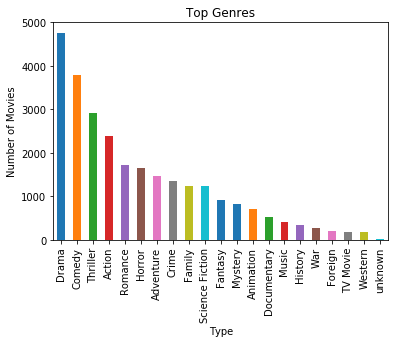

In [19]:
genres_s.value_counts(ascending = False).plot(kind='bar')
plt.title('Top Genres')
plt.xlabel('Type')
plt.ylabel('Number of Movies');

###### * As we can see Drama is leading the way followed by Comedy and Thriller. Action and Romance in fourth and fifth place. Western and TV Movie are the least two liked genres

##### Which movie has the longest runtime & which has the shortest ?

In [25]:
df_Longest=df.sort_values(by='runtime',ascending = False)
df_Longest[['original_title','runtime']].head(1)

,original_title,runtime
3894,The Story of Film: An Odyssey,15:00


#### * The longest runtime movie is ' The story of film:An Odyssey'

In [44]:
df_short=df.sort_values(by='runtime',ascending = True)
df_short[['original_title','runtime']].head(1)

,original_title,runtime
410,Anarchy Parlor,00:00


### Some graphs to visualise the relation between some properties 

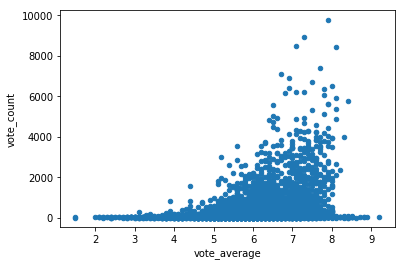

In [86]:
df.plot(x='vote_average', y='vote_count', kind='scatter');

#### * More than 50% of the movies are rated  8

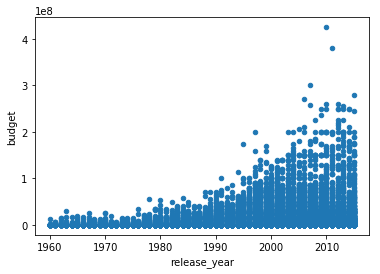

In [22]:
df.plot(x='release_year',y='budget',kind='scatter');

#### * The highest year budget was 2010 

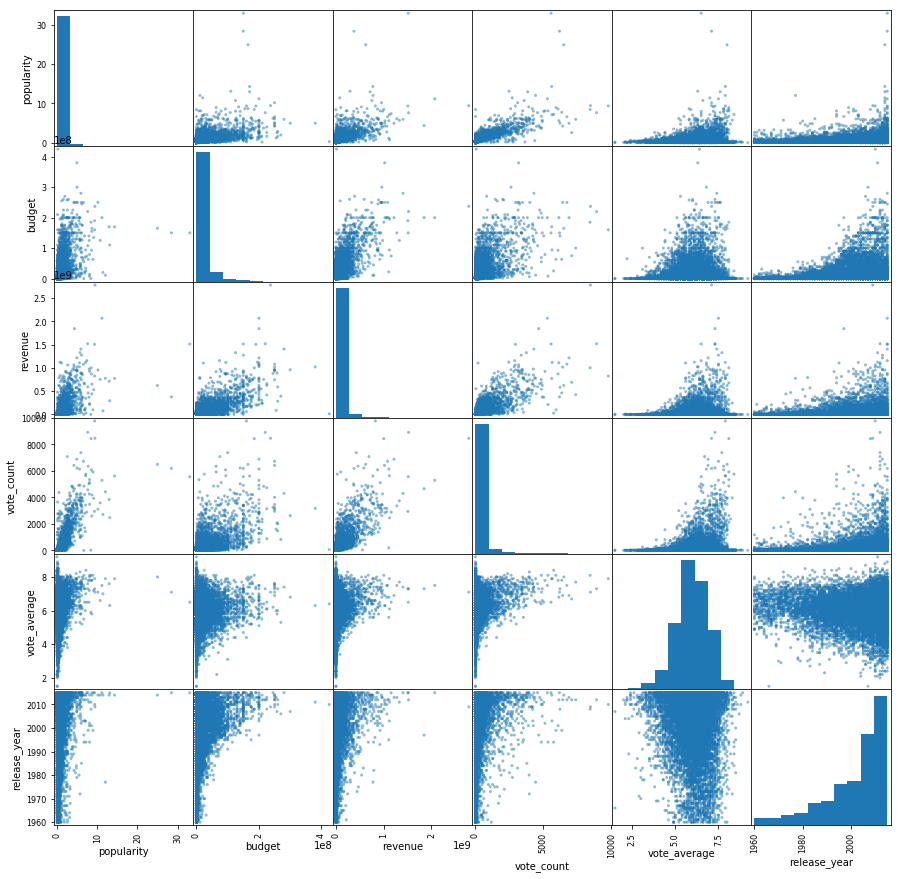

In [24]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

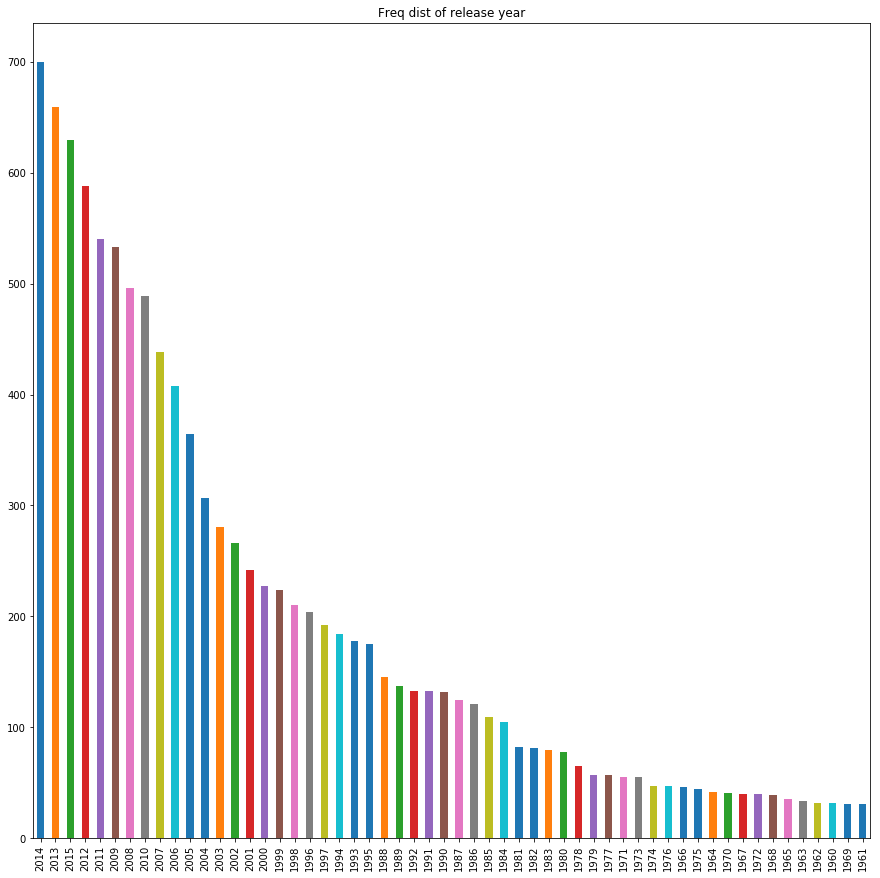

In [97]:
df['release_year'].value_counts().plot.bar(title='Freq dist of release year', figsize =(15,15));

#### * The highest number of movie are made in 2014 

### Some Analysis about the movies in 2015

In [66]:
df_2015 = df[df['release_year'] == 2015]

In [67]:
df_2015.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [68]:
df_2015.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,629.000000,6.290000e+02,6.290000e+02,629.000000,629.000000,629.000000,629.0
mean,1.030657,1.207718e+07,4.254762e+07,96.375199,290.019078,5.885692,2015.0
std,2.233958,3.318414e+07,1.678000e+08,26.087965,702.598425,1.087283,0.0
min,0.003920,0.000000e+00,0.000000e+00,0.000000,10.000000,2.400000,2015.0
25%,0.203224,0.000000e+00,0.000000e+00,88.000000,18.000000,5.200000,2015.0
50%,0.394466,0.000000e+00,0.000000e+00,95.000000,44.000000,5.900000,2015.0
75%,0.956096,6.000000e+06,3.286448e+06,107.000000,197.000000,6.700000,2015.0
max,32.985763,2.800000e+08,2.068178e+09,300.000000,6185.000000,8.900000,2015.0


### Most popular Actor 
##### Which are the most frequent actor involved?

In [20]:
cast_s = pd.Series(df['cast'].str.cat(sep = '|').split('|'))

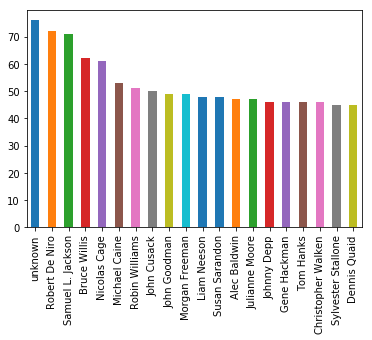

In [30]:
cast_s.value_counts(ascending = False).head(20).plot(kind='bar');

##### * Robert De Niro lead the way here.

#### What kinds of properties are associated with movies that have high revenues?

In [32]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [33]:
df.revenue.describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [34]:
high_revenue = df[df['revenue'] >=  3.982690e+07]

### 1-Production companies

In [40]:
high_revenue['production_companies'].value_counts().head(10)

Paramount Pictures                              56
Universal Pictures                              30
Columbia Pictures                               24
Warner Bros.                                    22
Walt Disney Pictures                            20
New Line Cinema                                 18
Twentieth Century Fox Film Corporation          17
DreamWorks Animation                            14
Touchstone Pictures                             14
Walt Disney Pictures|Pixar Animation Studios    13
Name: production_companies, dtype: int64

#### * 56 movies were produced by 'Parmount Pictures' company had high revenues .

### 2- Average votes

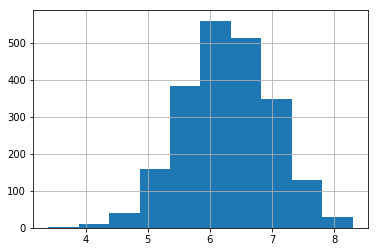

In [52]:
high_revenue['vote_average'].hist();

In [56]:
high_revenue.vote_average.mean()

6.2889400921658982

In [63]:
high_revenue.sort_values(by='vote_average',ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
7269,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972


#### * The highest movie rating is 'The Godfather' , vote average is 8.2
#### * The average vote of the high revenue movies is about 6.3

### The highest movie revenue 
##### Which movie had the highest and lowest revenue?

In [62]:
high_revenue.sort_values(by='revenue',ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009


#### * The highest movie revenue is 'Avatar' 
#### * Avatar budget around 237,000,000 Dollars and revenue 2,781,505,847 Dollars.

### Most popular movie 
#### Which movie is the most popular ?

In [64]:
high_revenue.sort_values(by='popularity',ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


#### * The most popular movie is 'Jurassic word' 

<a id='conclusions'></a>
## Conclusions
#### 1-Most popular Actor is Robert De Niro lead the way here 
#### 2-Drama is leading the way followed by Comedy and Thriller. Action and Romance in fourth and fifth place. Western and TV Movie are the least two liked genres.
#### 3- 56 movies were produced by 'Parmount Pictures' company had high revenues .
#### 4-The highest movie rating is 'The Godfather' , vote average is 8.2.
#### 5-The average vote of the high revenue movies is about 6.3
#### 6-The highest movie revenue is 'Avatar';budget around 237,000,000 Dollars and revenue 2,781,505,847 Dollars.
#### 7- 'Jurassic word' is raked the most popular movie in 2015.
#### 8- The longest runtime movie is ' The story of film:An Odyssey'
#### 9- The highest number of movie are made in 2014 

### The limitations associated with the conclusions are:
#### We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
#### There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.





## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])